In [1]:
import os
os.chdir('..')

In [2]:
from modules.get_data import get_x_y
from jh_utils.data.pandas.preprocessing import make_dummies

In [3]:
## third
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## models
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

## pos model
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf

In [5]:
x,y = get_x_y()

/home/joaoholz/Documents/ufes/trabalho_final/modules/get_data.py:6: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv("asteroides/asteoides.csv").iloc[:, first_columns:]


In [6]:
def fit_classify(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test,y_pred)
    col = ['N','Y']
    print(pd.DataFrame(cm,index=col,columns = col))

---
model

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)

In [ ]:
standard = StandardScaler()
x_train = standard.fit_transform(x_train)
x_test = standard.transform(x_test)

In [8]:
standard = MinMaxScaler()
x_train = standard.fit_transform(x_train)
x_test = standard.transform(x_test)

loss | opt | ll act | metric | dropout | layers | data | epoch | batch
---|---|---|---|---|---|---|---|---
BC | rms | sigmoid | 143/620  | True | 2 layers
mse | adam | sigmoid | 134/620  | True | 2 layers
BC | adam | sigmoid | 49/620 | True| 2 layers
BC | adam | sigmoid | 58-12/620 | True | 2 layers
BC | adam | sigmoid | 78-54/620 | no dropout | 1 layer 
BC | adam | sigmoid | 26-5/620 | no dropout | 2 layers
BC | adam | sigmoid | 48-18/620 | no dropout | 3 layers
BC | adam | sigmoid | 40-15/620 | no dropout | 2 layers | full data
BC | adam | sigmoid | 18-9/620 | no dropout | 3 layers | full data
BC | adam | tanh | 120/620 | no dropout | 3 layers | full data
BC | adam | sigmoid | 5-1/620 | no dropout | 3 layers | full data | 20 | 128
BC | adam | sigmoid | 5-1/620 | no dropout | 3 layers | full data | 40 | 128
BC | adam | sigmoid | 5-1/620 | no dropout | 3 layers | full data | 40 | 64

In [9]:
## optimizer
rms='rmsprop'
adam='adam'

## loss
SPC = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
CC = tf.keras.losses.CategoricalCrossentropy()
BC = 'binary_crossentropy'
MSE = 'mse'
SCC = 'sparse_categorical_crossentropy'

## last layer
softmax = 'softmax'
sigmoid = 'sigmoid'


dropou x 2 layers x activation last layer

In [12]:
x_train.shape

(652634, 38)

In [10]:
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(38,)))
model_3.add(tf.keras.layers.Dense(16, activation='relu'))
model_3.add(tf.keras.layers.Dense(8, activation='relu'))
model_3.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_3.compile(loss=BC, optimizer=adam, metrics=[tf.keras.metrics.Precision(),'accuracy'])

In [11]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                624       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_3.fit(x_train,y_train, epochs=15, batch_size=256, verbose=1)

Epoch 1/15
2550/2550 [==============================] - 7s 3ms/step - loss: 0.0019 - precision: 0.8113 - accuracy: 0.9992
Epoch 2/15
2550/2550 [==============================] - 7s 3ms/step - loss: 0.0020 - precision: 0.8054 - accuracy: 0.9991
Epoch 3/15
2550/2550 [==============================] - 8s 3ms/step - loss: 0.0019 - precision: 0.8152 - accuracy: 0.9992
Epoch 4/15
2550/2550 [==============================] - 8s 3ms/step - loss: 0.0019 - precision: 0.8023 - accuracy: 0.9991
Epoch 5/15
2550/2550 [==============================] - 7s 3ms/step - loss: 0.0018 - precision: 0.8323 - accuracy: 0.9992
Epoch 6/15
2550/2550 [==============================] - 7s 3ms/step - loss: 0.0017 - precision: 0.8324 - accuracy: 0.9992
Epoch 7/15
2550/2550 [==============================] - 7s 3ms/step - loss: 0.0018 - precision: 0.8406 - accuracy: 0.9993
Epoch 8/15
2550/2550 [==============================] - 7s 3ms/step - loss: 0.0016 - precision: 0.8407 - accuracy: 0.9993
Epoch 9/15
2550/2550 [==

In [17]:
y_prob = model_3.predict(x_test)
y_prob.max()

8741/8741 [==============================] - 8s 897us/step


0.98944914

In [18]:
y_pred = list(map(lambda x: x>0.05, y_prob))
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    279081
           1       0.48      1.00      0.65       620

    accuracy                           1.00    279701
   macro avg       0.74      1.00      0.83    279701
weighted avg       1.00      1.00      1.00    279701

[[278422    659]
 [     1    619]]


In [ ]:
_ = plt.hist(y_prob[y_test.pha_Y==1])

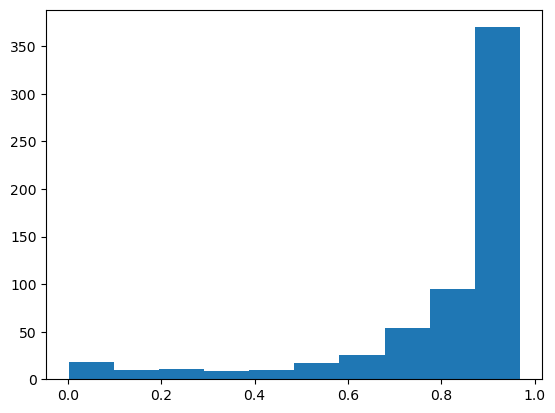

In [15]:
### plot 30 epochs
_ = plt.hist(y_prob[y_test.pha_Y==1])

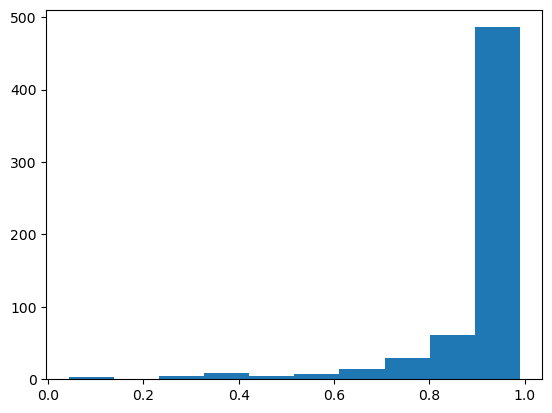

In [19]:
## 45 epochs
_ = plt.hist(y_prob[y_test.pha_Y==1])

In [20]:
from sklearn.metrics import roc_auc_score

In [21]:
from sklearn.metrics import RocCurveDisplay

## precisamos ter cuidado com medidas pois nosso dataset esta muito desbalanceado

In [26]:
roc_auc_score(y_test,y_prob)

0.999847858946258

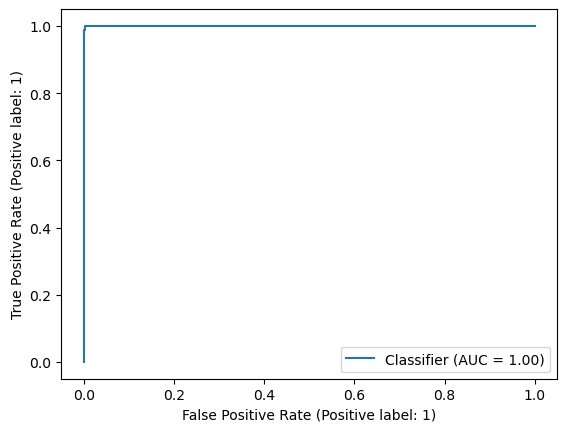

In [25]:
RocCurveDisplay.from_predictions(y_test,y_prob)

In [27]:
rf = RandomForestClassifier(n_estimators=150)
ada = AdaBoostClassifier()
knn = KNeighborsClassifier()
ridge = RidgeClassifier()
dt = DecisionTreeClassifier()

In [28]:
fit_classify(rf)

/tmp/ipykernel_24530/2329049293.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    279081
           1       0.98      0.98      0.98       620

    accuracy                           1.00    279701
   macro avg       0.99      0.99      0.99    279701
weighted avg       1.00      1.00      1.00    279701

        N    Y
N  279071   10
Y      11  609


In [35]:
y_prob = rf.predict_proba(x_test)[:,1]
y_pred = list(map(lambda x: x>0.05, y_prob))
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
col = ['N','Y']
print(pd.DataFrame(cm,index=col,columns = col))

In [36]:
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
col = ['N','Y']
print(pd.DataFrame(cm,index=col,columns = col))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    279081
           1       0.62      1.00      0.77       620

    accuracy                           1.00    279701
   macro avg       0.81      1.00      0.88    279701
weighted avg       1.00      1.00      1.00    279701

        N    Y
N  278705  376
Y       2  618


In [29]:
fit_classify(knn)

/home/joaoholz/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    279081
           1       0.54      0.28      0.37       620

    accuracy                           1.00    279701
   macro avg       0.77      0.64      0.68    279701
weighted avg       1.00      1.00      1.00    279701

        N    Y
N  278933  148
Y     447  173


In [37]:
fit_classify(ada)

/home/joaoholz/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    279081
           1       0.98      0.97      0.98       620

    accuracy                           1.00    279701
   macro avg       0.99      0.99      0.99    279701
weighted avg       1.00      1.00      1.00    279701

        N    Y
N  279071   10
Y      18  602


In [40]:
ada.predict_proba(x_test)[:,1]

array([0.35665096, 0.34960181, 0.36321861, ..., 0.34960181, 0.36070766,
       0.34560249])

In [48]:
y_prob = ada.predict_proba(x_test)[:,1]

In [52]:
y_pred = list(map(lambda x: x>0.37, y_prob))
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
col = ['N','Y']
print(pd.DataFrame(cm,index=col,columns = col))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    279081
           1       0.07      1.00      0.14       620

    accuracy                           0.97    279701
   macro avg       0.54      0.99      0.56    279701
weighted avg       1.00      0.97      0.98    279701

        N     Y
N  271231  7850
Y       1   619
